In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
fahadullaha_facial_emotion_recognition_dataset_path = kagglehub.dataset_download('fahadullaha/facial-emotion-recognition-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'facial-emotion-recognition-dataset' dataset.
Data source import complete.


In [2]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import os

In [3]:
root_path = fahadullaha_facial_emotion_recognition_dataset_path
root_path

'/kaggle/input/facial-emotion-recognition-dataset'

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

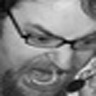

In [6]:
from PIL import Image

img = Image.open(f'{root_path}/processed_data/angry/angry_00000.jpg')
img

In [7]:
from torch.utils.data import DataLoader, random_split
from torchvision import datasets

def make_dataset(transform):
  full_dataset = datasets.ImageFolder(
    root = f'{root_path}/processed_data',
    transform = transform,

  )
  torch.manual_seed(42)
  # train_dataset , test_dataset = random_split(full_dataset , [0.8, 0.2])
  train_len = int(0.8 * len(full_dataset))
  test_len = len(full_dataset) - train_len
  train_dataset, test_dataset = random_split(full_dataset, [train_len, test_len])


  return train_dataset, test_dataset


In [8]:
import torchvision.models as models
torch.manual_seed(42)

model = models.mobilenet_v2(weights = models.MobileNet_V2_Weights.IMAGENET1K_V1)
model

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 139MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
from torch import nn


num_classes = 7
#mobilnet v2
model.classifier = nn.Sequential(
    nn.Dropout(p = 0.2, inplace = False),
    nn.Linear(
        in_features= model.classifier[1].in_features,
        out_features = num_classes,
        bias = True
    )
)

model.to(device)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary


summary(model=model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=22,
        row_settings=["var_names"]
)


Layer (type (var_name))                       Input Shape            Output Shape           Param #                Trainable
MobileNetV2 (MobileNetV2)                     [32, 3, 224, 224]      [32, 7]                --                     True
├─Sequential (features)                       [32, 3, 224, 224]      [32, 1280, 7, 7]       --                     True
│    └─Conv2dNormActivation (0)               [32, 3, 224, 224]      [32, 32, 112, 112]     --                     True
│    │    └─Conv2d (0)                        [32, 3, 224, 224]      [32, 32, 112, 112]     864                    True
│    │    └─BatchNorm2d (1)                   [32, 32, 112, 112]     [32, 32, 112, 112]     64                     True
│    │    └─ReLU6 (2)                         [32, 32, 112, 112]     [32, 32, 112, 112]     --                     --
│    └─InvertedResidual (1)                   [32, 32, 112, 112]     [32, 16, 112, 112]     --                     True
│    │    └─Sequential (conv)        

In [13]:
Weights = models.MobileNet_V2_Weights.IMAGENET1K_V2
Weights.meta['_docs']

"\n                These weights improve upon the results of the original paper by using a modified version of TorchVision's\n                `new training recipe\n                <https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/>`_.\n            "

In [14]:
model_transform = Weights.transforms()
model_transform

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [15]:
train_dataset, test_dataset = make_dataset(model_transform)
num_classes = len(train_dataset.dataset.classes)

In [16]:
num_classes


7

In [17]:
from torch.utils.data import DataLoader
import os
train_dataloader = DataLoader(
    dataset= train_dataset,
    batch_size= 32,
    shuffle = True,
    num_workers= os.cpu_count()

)

test_dataloader = DataLoader(
    dataset = test_dataset,
    batch_size = 32,
    shuffle = False,
    num_workers= os.cpu_count()
)

In [18]:

import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
  """
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate  and accumulate loss
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

      # Calculate and accumulate accuracy metric across all batches
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0
  all_preds, all_labels = [], []

  # Turn on inference context manager
  with torch.inference_mode():
      # Loop through DataLoader batches
      for batch, (X, y) in enumerate(dataloader):
          # Send data to target device
          X, y = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred_logits = model(X)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, y)
          test_loss += loss.item()

          # Calculate and accumulate accuracy
          test_pred_labels = test_pred_logits.argmax(dim=1)
          test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

          # Store results for later analysis
          all_preds.extend(test_pred_labels.cpu().numpy())
          all_labels.extend(y.cpu().numpy())

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc,  all_preds, all_labels



In [19]:
from timeit import default_timer as Timer
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> dict[str, list]:

  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]
                  total_time : }
    For example if training for epochs=2:
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]
                  total_time : 300s}
  """
  # Create empty results dictionary
  results = {
      "train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": [],
      'all_preds' : [],
      'all_labels' : [],
  }


  start_time = Timer()
  # Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
      train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
      test_loss, test_acc,all_preds, all_labels  = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

      # Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
      )

      # Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

  end_time = Timer()

  results['total_time'] = end_time - start_time
  results['all_preds'] = all_preds
  results['all_labels'] = all_labels
  # Return the filled results at the end of the epochs
  return results

In [20]:
import os

data_root = f'{root_path}/processed_data'
counts = {}

for cls in os.listdir(data_root):
    path = os.path.join(data_root, cls)
    if os.path.isdir(path):
        counts[cls] = len(os.listdir(path))
        # print(f"{cls}: {len(os.listdir(path))}")

counts


{'surprise': 5920,
 'fear': 5920,
 'angry': 5920,
 'neutral': 8166,
 'sad': 6535,
 'disgust': 5920,
 'happy': 11398}

In [21]:
import torch

class_names = train_dataset.dataset.classes
weights = torch.tensor([1.0 / counts[c] for c in class_names], dtype=torch.float)

model.to(device)
weight=weights.to(device)

loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))
optimizer = torch.optim.Adam(model.parameters(),  lr=1e-3, weight_decay=1e-4)


In [22]:
results = train(
    model = model,
    train_dataloader = train_dataloader,
    test_dataloader = test_dataloader,
    optimizer = optimizer,
    loss_fn = loss_fn,
    epochs = 10,
    device = device
)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1952 | train_acc: 0.5684 | test_loss: 1.0576 | test_acc: 0.6247
Epoch: 2 | train_loss: 1.0045 | train_acc: 0.6413 | test_loss: 0.9722 | test_acc: 0.6594
Epoch: 3 | train_loss: 0.9365 | train_acc: 0.6667 | test_loss: 0.9523 | test_acc: 0.6518
Epoch: 4 | train_loss: 0.8878 | train_acc: 0.6865 | test_loss: 0.9031 | test_acc: 0.6752
Epoch: 5 | train_loss: 0.8561 | train_acc: 0.6983 | test_loss: 0.8978 | test_acc: 0.6764
Epoch: 6 | train_loss: 0.8219 | train_acc: 0.7078 | test_loss: 0.8837 | test_acc: 0.6842
Epoch: 7 | train_loss: 0.7899 | train_acc: 0.7192 | test_loss: 0.8714 | test_acc: 0.6871
Epoch: 8 | train_loss: 0.7616 | train_acc: 0.7308 | test_loss: 0.8857 | test_acc: 0.6784
Epoch: 9 | train_loss: 0.7358 | train_acc: 0.7362 | test_loss: 0.8537 | test_acc: 0.6957
Epoch: 10 | train_loss: 0.7091 | train_acc: 0.7478 | test_loss: 0.8420 | test_acc: 0.6994


In [23]:
results['total_time'] // 60

32.0

In [25]:
dimg = Image.open(f'{root_path}/processed_data/angry/angry_00000.jpg')

img_tensor = model_transform(img)
model.eval()
with torch.inference_mode():
  y_pred = model(img_tensor.unsqueeze(dim = 0).to(device))
  pred_class = class_names[y_pred.argmax(dim = 1)]
  print(pred_class)


angry


### Get real time prediction in colab

In [26]:
from IPython.display import Javascript, display
from google.colab.output import eval_js
import cv2
import numpy as np
from base64 import b64decode


In [27]:
def take_photo(quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📸 Capture';
        div.appendChild(capture);
        document.body.appendChild(div);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        document.body.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Wait for button press
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        video.remove();
        div.remove();

        const dataUrl = canvas.toDataURL('image/jpeg', quality);
        return dataUrl;
      }
      takePhoto(%f);
    ''' % quality)

    display(js)
    data = eval_js('takePhoto(%f)' % quality)
    binary = b64decode(data.split(',')[1])
    arr = np.frombuffer(binary, dtype=np.uint8)
    return cv2.imdecode(arr, cv2.IMREAD_COLOR)


In [28]:
from torchvision import  transforms

train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])


In [ ]:
from google.colab import output
import time
from IPython.display import display, HTML, clear_output
from google.colab.patches import cv2_imshow


display(HTML('''
<button onclick="window.colab_stop_loop = true">Stop Capture</button>
<script>window.colab_stop_loop = false;</script>
'''))

while True:
    # Check stop flag from JS
    stop = output.eval_js("window.colab_stop_loop")
    if stop == 'true':
        print("Stopped by user.")
        break

    # Take photo (NumPy array)
    frame = take_photo()  # assumes this is defined
    cv2_imshow(frame)

    # Preprocess and predict
    input_tensor = model_transform(Image.fromarray(frame)).unsqueeze(dim = 0).to(device)
  # (1,C,H,W)
    model.eval()
    with torch.inference_mode():
        y_pred = model(input_tensor)
        pred_class_name = class_names[y_pred.argmax(dim=1).item()]

    print('Predicted Emotion:', pred_class_name)

    # Small delay to avoid flooding
    time.sleep(0.1)

In [ ]:
#save the model

from pathlib import Path

model_path = Path('Models')

model_path.mkdir(
    parents=True,
    exist_ok=True
)

model_name = 'mobilnetv2_emotion_detection'

model_save_path = model_path / model_name


torch.save({
    'model' : model.state_dict(),
    'class_names' : class_names,
    'img_size' : 232,
}, f = model_save_path)

### Get real time prediction in local device

In [ ]:
#load the model in local device

import torch
import torch.nn as nn
from torchvision import models

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1️⃣ Recreate the model architecture exactly
num_classes = 7
model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)
model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=False),
    nn.Linear(
        in_features=model.classifier[1].in_features,
        out_features=num_classes,
        bias=True
    )
)
model.to(device)



In [ ]:
checkpoint = torch.load("/Users/akash/All code/python/random/mobilnetv2_emotion_detection", map_location=device) #path to the saved model
model.load_state_dict(checkpoint["model"])


In [ ]:
num_classes = checkpoint['class_names']
num_classes

In [ ]:
import cv2
from torchvision import transforms
from PIL import Image

# Preprocessing transform (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Set model to eval mode
model.eval()

# Open webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam")
else:
    print("Press 'q' to quit")
    
    while True:
        ret, frame = cap.read()
        
        if not ret:
            print("Error: Can't receive frame")
            break
        
        # Convert to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Detect faces
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        
        # Process each detected face
        for (x, y, w, h) in faces:
            # Draw rectangle around face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            
            # Extract face region
            face_roi = frame[y:y+h, x:x+w]
            
            # Convert BGR to RGB
            face_rgb = cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)
            
            # Convert to PIL Image
            face_pil = Image.fromarray(face_rgb)
            
            # Preprocess
            face_tensor = transform(face_pil).unsqueeze(0).to(device)
            
            # Predict emotion
            with torch.inference_mode():
                output = model(face_tensor)
                pred_idx = output.argmax(dim=1).item()
                if pred_idx != 1:
                    emotion = num_classes[pred_idx]
                    confidence = torch.softmax(output, dim=1)[0][pred_idx].item()
            
            # Display emotion on frame
            text = f"{emotion}: {confidence:.2f}"
            cv2.putText(frame, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        
        # Show frame
        cv2.imshow('Real-time Emotion Detection - Press Q to quit', frame)
        
        # Press 'q' to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()
    print("Webcam released")